In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TOP 5 Line plot

C:\Users\82104\anaconda3\envs\bigdata_project\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0.5, 1.0, 'TOP 5 / GOLD medals')

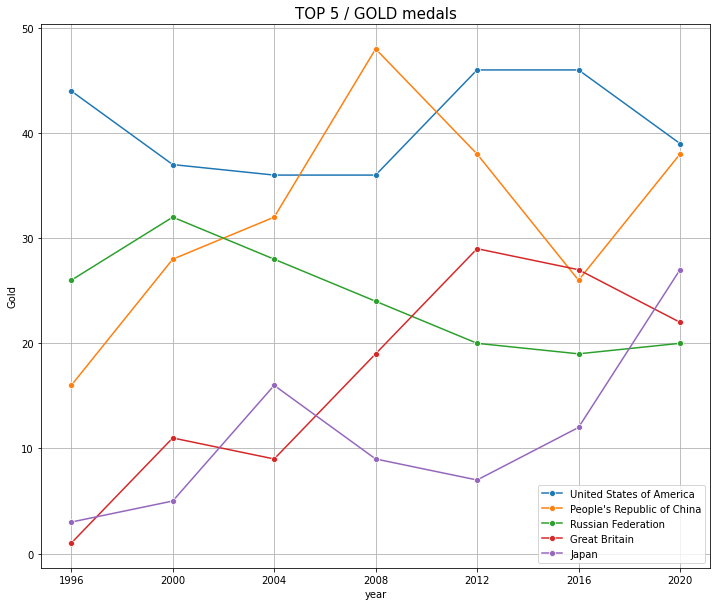

In [2]:
data = pd.read_csv('./data/olympic.csv')

summer_mask = data['type'] == 'summer'
summer = data[summer_mask]

ROC = summer['Nation'] == 'ROC'
summer.loc[ROC, 'Nation'] = 'Russian Federation'

top_5 = ['United States of America', 'People\'s Republic of China', 'Russian Federation', 'Great Britain', 'Japan']

mask = summer['Nation'].isin(top_5)
top_5_summer = summer[mask]

group = top_5_summer.groupby('Nation')

f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1,1,1)
for name in top_5:
    df = group.get_group(name)
    sns.lineplot(data=df, x='year', y='Gold', marker='o', label=name, ax=ax)
ax.set_xticks(list(range(1996, 2021, 4)))
ax.grid()
ax.set_title('TOP 5 / GOLD medals', size=15)

Text(0.5, 1.0, 'TOP 5 / Ranking')

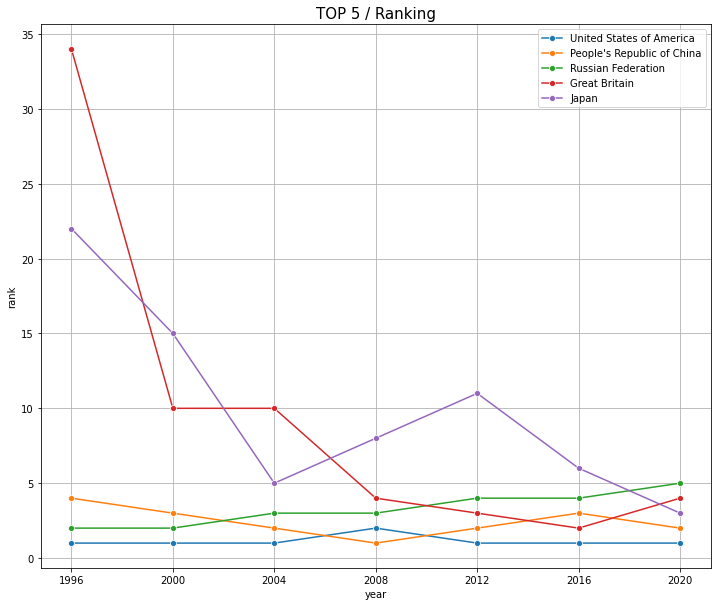

In [51]:
f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1,1,1)
for name in top_5:
    df = group.get_group(name)
    sns.lineplot(data=df, x='year', y='rank', marker='o', label=name, ax=ax)
ax.set_xticks(list(range(1996, 2021, 4)))
ax.grid()
ax.set_title('TOP 5 / Ranking', size=15)

Text(0.5, 1.0, 'TOP 5 / Total Ranking')

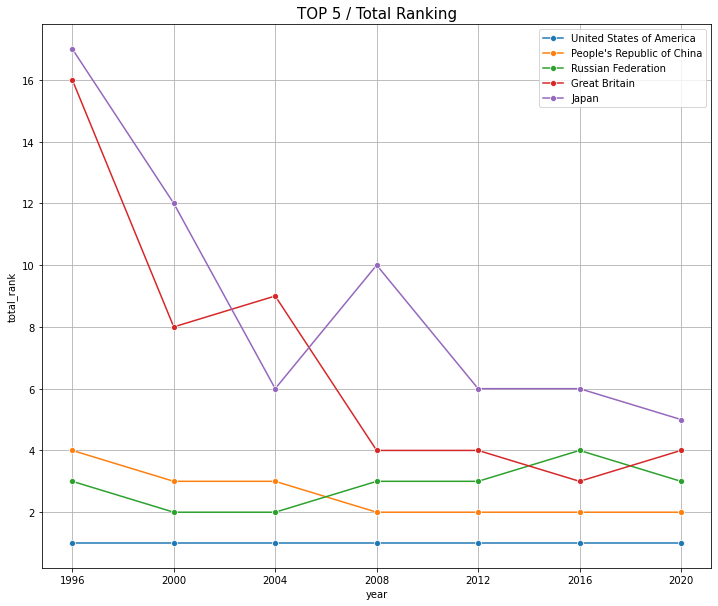

In [53]:
f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1,1,1)
for name in top_5:
    df = group.get_group(name)
    sns.lineplot(data=df, x='year', y='total_rank', marker='o', label=name, ax=ax)
ax.set_xticks(list(range(1996, 2021, 4)))
ax.grid()
ax.set_title('TOP 5 / Total Ranking', size=15)

# TOP 5 medals

Text(0.5, 1.0, 'Top 5 Gold medals')

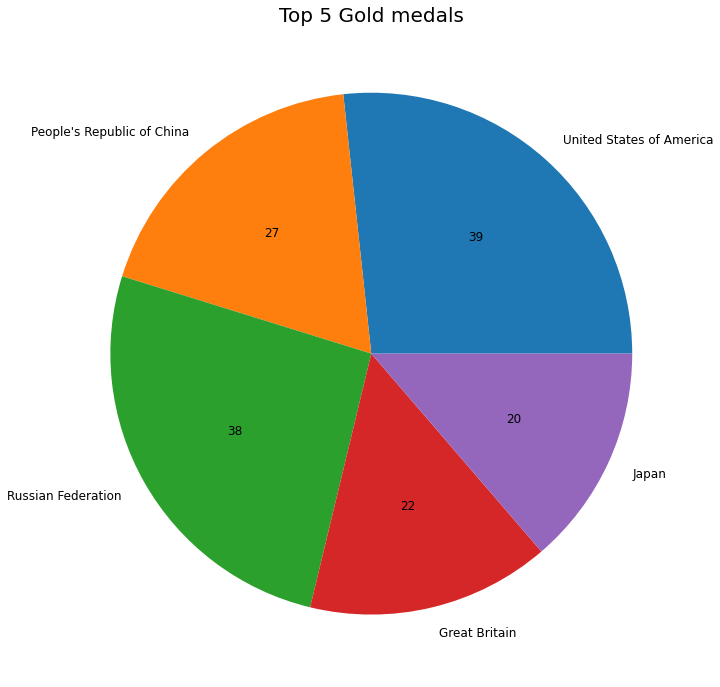

In [46]:
tokyo = top_5_summer[top_5_summer['Olympic'] == 'tokyo-2020']
f = plt.figure(figsize=(12, 12))
ax = f.add_subplot(1, 1, 1)
ax.pie(tokyo['Gold'],
      labels=top_5,
      autopct=lambda p: '{:.0f}'.format(p * sum(tokyo['Gold']) / 100),
      textprops={'fontsize': 12})
ax.set_title('Top 5 Gold medals', size=20)

Text(0.5, 1.0, 'Top 5 total medals')

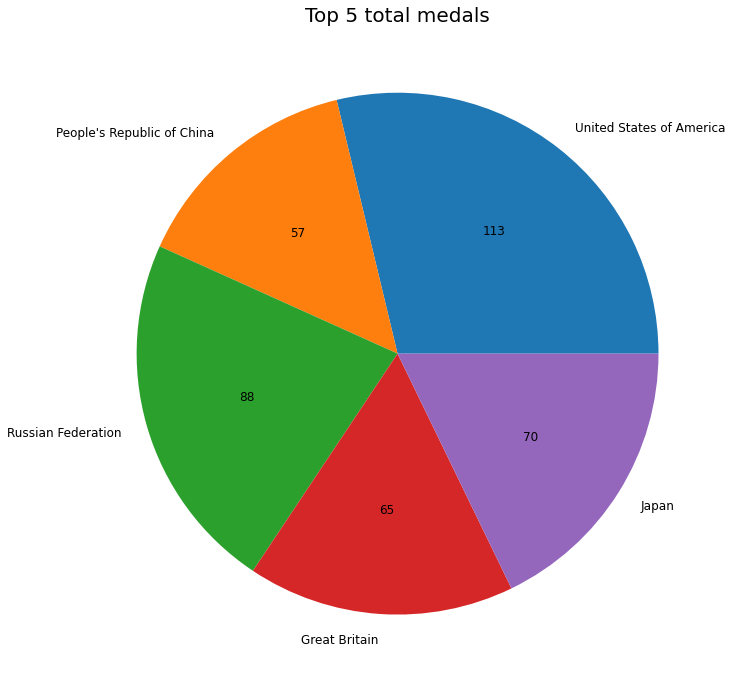

In [49]:
tokyo = top_5_summer[top_5_summer['Olympic'] == 'tokyo-2020']
f = plt.figure(figsize=(12, 12))
ax = f.add_subplot(1, 1, 1)
ax.pie(tokyo['total'],
      labels=top_5,
      autopct=lambda p: '{:.0f}'.format(p * sum(tokyo['total']) / 100),
      textprops={'fontsize': 12})
ax.set_title('Top 5 total medals', size=20)

# TOP 5 Home Advantage

In [56]:
top_5_summer['host'] = 'N'

C:\Users\82104\anaconda3\envs\bigdata_project\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
atlanta = (top_5_summer['Olympic'] == 'atlanta-1996') & (top_5_summer['Nation'] == 'United States of America')
beijing = (top_5_summer['Olympic'] == 'beijing-2008') & (top_5_summer['Nation'] == 'People\'s Republic of China')
london = (top_5_summer['Olympic'] == 'london-2012') & (top_5_summer['Nation'] == 'Great Britain')
tokyo = (top_5_summer['Olympic'] == 'tokyo-2020') & (top_5_summer['Nation'] == 'Japan')

top_5_summer.loc[atlanta, 'host'] = 'Y'
top_5_summer.loc[beijing, 'host'] = 'Y'
top_5_summer.loc[london, 'host'] = 'Y'
top_5_summer.loc[tokyo, 'host'] = 'Y'

C:\Users\82104\anaconda3\envs\bigdata_project\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0.5, 1.0, 'host VS None host Gold medals')

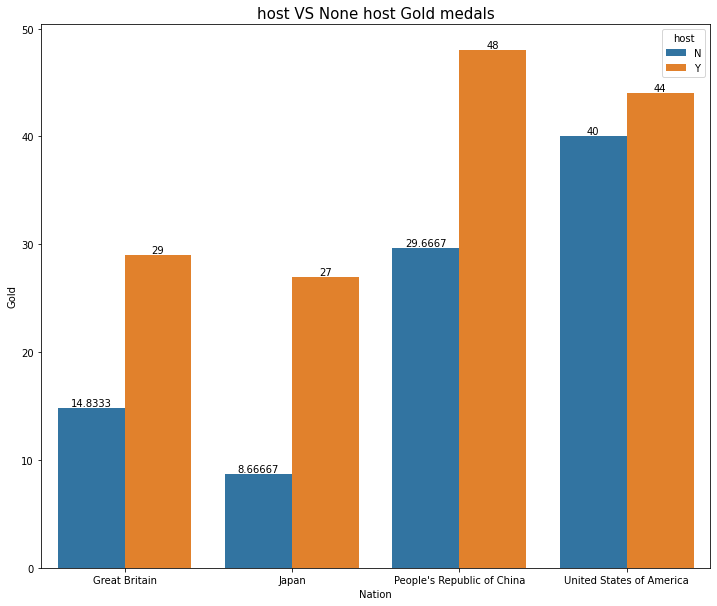

In [58]:
temp_list = []
No_df = top_5_summer[top_5_summer['host'] == 'N']
y_df = top_5_summer[top_5_summer['host'] == 'Y']
temp = No_df.groupby('Nation')[['Gold', 'Silver', 'Bronze']].mean()
temp['Nation'] = temp.index
temp['host'] = 'N'
temp = temp.reset_index(drop=True)
temp2 = y_df[['Gold', 'Silver', 'Bronze', 'Nation', 'host']]
com = pd.concat([temp, temp2])
com = com[com['Nation'] != 'Russian Federation']
com['total'] = com.apply(lambda x: x['Gold'] + x['Silver'] + x['Bronze'], axis=1)

f = plt.figure(figsize=(12, 10))
ax = f.add_subplot(1,1,1)
sns.barplot(data=com, x='Nation', y='Gold', hue='host', ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('host VS None host Gold medals', fontsize=15)

Text(0.5, 1.0, 'host VS None host Total medals')

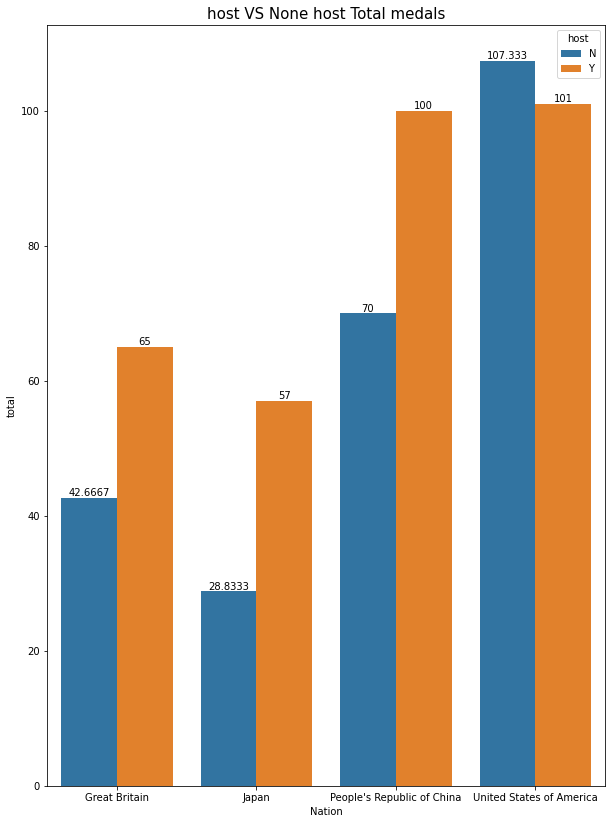

In [59]:
f = plt.figure(figsize=(10, 14))
ax = f.add_subplot(1,1,1)
sns.barplot(data=com, x='Nation', y='total', hue='host', ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('host VS None host Total medals', size=15)